# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [3]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [5]:
df.corr()['Price']

Price       1.000000
Mileage    -0.143051
Cylinder    0.569086
Liter       0.558146
Doors      -0.138750
Cruise      0.430851
Sound      -0.124348
Leather     0.157197
Name: Price, dtype: float64

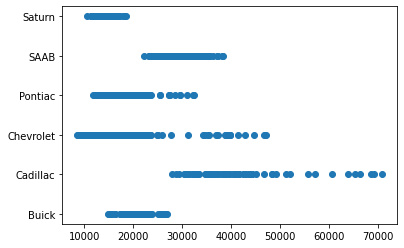

In [6]:
plt.scatter(x=df.Price,y=df.Make)

Tasks_Part 1

In [7]:
df.groupby('Price')['Mileage'].mean()

Price
8638.930895     25216.0
8768.998585     35299.0
8870.947316     32914.0
9041.906254     26191.0
9220.829677     29992.0
                 ...   
65281.481237    15600.0
66374.307040    12021.0
68566.187189     6420.0
69133.731722     7892.0
70755.466717      583.0
Name: Mileage, Length: 798, dtype: float64

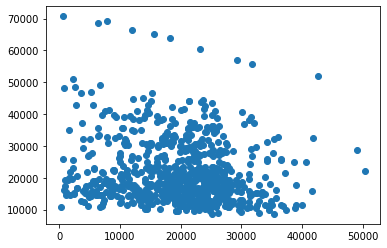

In [8]:
plt.scatter(x=df.Mileage,y=df.Price)

In [9]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [10]:
## spliting data 
x=df['Mileage'].values
y=df['Price'].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [11]:
## converting data  in 1D array

x_train=x_train.reshape(-1,1)  
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [12]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [13]:
##find value of c & m 

m=regression.coef_
c=regression.intercept_

print("value of m :-",m)
print("value of c :-",c)

value of m :- [[-0.16009926]]
value of c :- [24770.09742832]


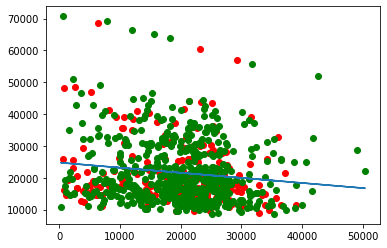

In [14]:
y_prdict=regression.predict(x_test)

plt.scatter(x_test,y_test,color="Red")
plt.scatter(x_train,y_train,color="Green")
plt.plot(x.reshape(-1,1),regression.predict(x.reshape(-1,1)))

In [15]:
## R2 score
r2_score=regression.score(x_test,y_prdict)
if r2_score>=0.8:
  print(r2_score,'equation is a good fit for this data.')
else:
  print(r2_score,'equation is  not good fit for this data.')


1.0 equation is a good fit for this data.


Tasks_part 2

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


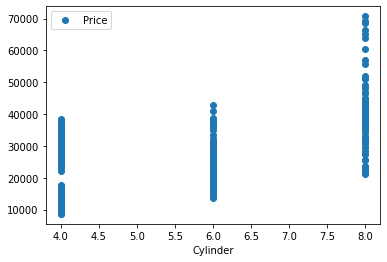

In [16]:
df.plot(x='Cylinder', y='Price', style='o')
df[['Cylinder','Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


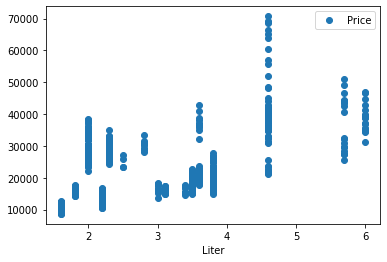

In [17]:
df.plot(x='Liter', y='Price',style='o')
df[['Liter','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


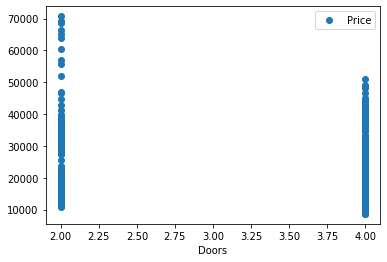

In [18]:
df.plot(x='Doors', y='Price',style='o')
df[['Doors','Price']].corr()

there is strong linear relationship between cyliender , litrs doors so no need to transformation

In [19]:
## split the data 

x1=df[['Mileage','Cylinder','Doors','Liter','Cruise','Sound','Leather']].values
y1=df['Price'].values

In [20]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3)

In [21]:
x1_train.shape

(562, 7)

In [22]:
##scaling data 

from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(x1_train) # we are finding the values of mean and sd from the td
x_train_scaled = scaler.transform(x1_train) # fit (mean, sd) and then transform the training data
x_test_scaled = scaler.transform(x1_test)

In [23]:
from sklearn.linear_model import LinearRegression

regression1=LinearRegression()

regression1.fit(x_train_scaled,y1_train)

LinearRegression()

In [24]:
coeff_df = pd.DataFrame(regression1.coef_,['Mileage','Cylinder','Doors','Liter','Cruise','Sound','Leather'], columns=['Coefficient'])
coeff_df

,Coefficient
Mileage,-1246.720520
Cylinder,4198.388870
Doors,-943.166280
Liter,-240.446022
Cruise,2705.778061
Sound,-1164.978057
Leather,1432.070076


In [25]:
regression1.intercept_

21622.852622498944

In [26]:
y1_predict=regression1.predict(x_test_scaled)

In [27]:
##r2 score

r2score=regression1.score(x_test_scaled,y1_predict)

if r2score>=0.8:
  print(r2score,'equation is a good fit for this data.')
else:
  print(r2score,'equation is  not good fit for this data.')



1.0 equation is a good fit for this data.


In [28]:
from sklearn.feature_selection import RFE

estimator=LinearRegression()
selectors=RFE(estimator,n_features_to_select=3)
selctors=selectors.fit(x_train_scaled,y1_train)

list(zip(['Mileage','Cylinder','Doors','Liter','Cruise','Sound','Leather'],selectors.ranking_))

[('Mileage', 2),
 ('Cylinder', 1),
 ('Doors', 4),
 ('Liter', 5),
 ('Cruise', 1),
 ('Sound', 3),
 ('Leather', 1)]

Tasks_hard mode

In [29]:
xd=df[['Make','Type','Model']]
yd=df['Price']

xd = pd.get_dummies(xd,  drop_first=True)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

xt=OneHotEncoder().fit_transform(xd)



In [30]:

from sklearn.model_selection import train_test_split

xd_train,xd_test,yd_train,yd_test=train_test_split(xt,yd,test_size=0.3)


from sklearn.linear_model import LinearRegression

regression_d=LinearRegression()

regression_d.fit(xd_train,yd_train)

LinearRegression()

In [31]:
y_predd=regression_d.predict(xd_test)


In [32]:
r2_d=regression_d.score(xd_test,yd_test)
r2_d

0.9518168624824187

In [33]:
# extract Categorical feature using  boolean mask for encoding 
categorical_feature_mask = df.dtypes==object

categorical_cols = df.columns[categorical_feature_mask].tolist()


In [34]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [35]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,21,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,21,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,21,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,21,3,6,3.0,4,1,1,0


In [36]:
xf=df[['Mileage',	'Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
yf=df['Price']

xf_train,xf_test,yf_train,yf_test=train_test_split(xf,yf,test_size=0.3)


from sklearn.linear_model import LinearRegression
regressionf=LinearRegression()
regressionf.fit(xf_train,yf_train)



LinearRegression()

In [37]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(xf_train, yf_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(xf_train.columns, importance)
imp=[]
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    imp.append(feature)
  

In [38]:
feature_data=pd.DataFrame(imp,columns=['feature','score'])
feature_data

,feature,score
0,Cylinder,0.443451
1,Model,0.333383
2,Liter,0.119710
3,Make,0.041584
4,Mileage,0.039598
5,Trim,0.011741
6,Type,0.009276
7,Leather,0.000614
8,Sound,0.000308
9,Doors,0.000214


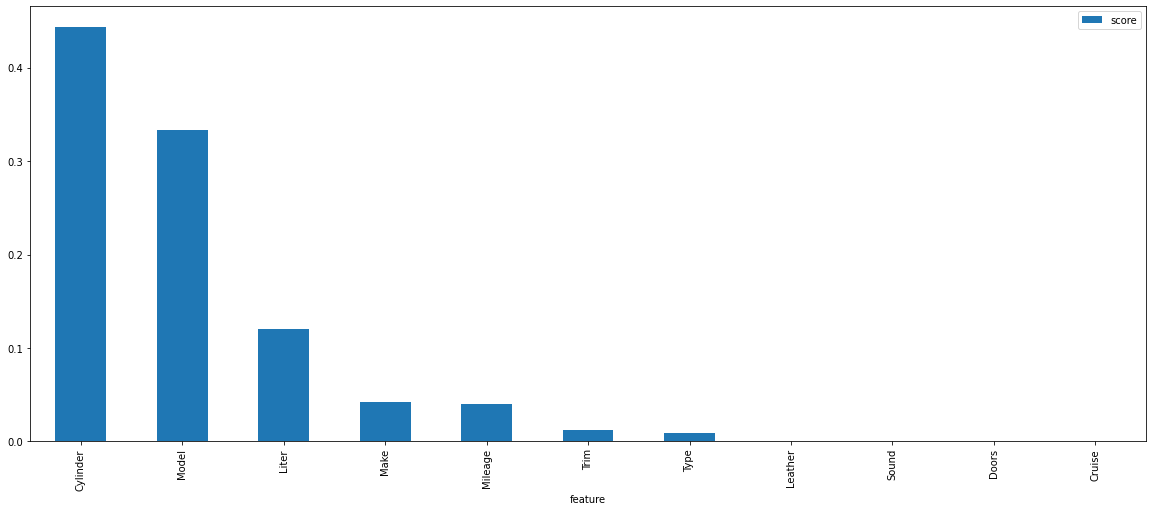

In [39]:
feature_data.plot.bar(x='feature',y='score',figsize=(20,8))
plt.show()

the best combination of factors for price prediction is 

1.  Liter
2.  Model
3.  Make
4.  Mileage
5.  Trim








In [40]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score

for i in range (1,6):
  f_selection=sfs(regressionf,n_features_to_select=i)
  f_selection.fit(xf,yf)
  feature_selected=f_selection.get_feature_names_out()
  print(f'best {i}  features are {feature_selected}')
  xff=df.loc[ :,feature_selected]
  yff=df.loc[ :,'Price']
  xff_train,xff_test,yff_train,yff_test=train_test_split(xff,yff,test_size=0.3)
  regressionf.fit(xff_train,yff_train)
  yff_predict=regressionf.predict(xff_test)
  print('r2 score :-',r2_score(yff_test, yff_predict, multioutput='variance_weighted'))

best 1  features are ['Liter']
r2 score :- 0.3288964197708707
best 2  features are ['Liter' 'Sound']
r2 score :- 0.32404775168347566
best 3  features are ['Mileage' 'Liter' 'Sound']
r2 score :- 0.42533191146073274
best 4  features are ['Mileage' 'Liter' 'Cruise' 'Sound']
r2 score :- 0.41740757672554546
best 5  features are ['Mileage' 'Trim' 'Liter' 'Cruise' 'Sound']
r2 score :- 0.4075008926751055
